In [3]:
import pandas as pd
import numpy as np
import scipy as stats

In [4]:
dfe = pd.read_csv('3E.csv')
dfe = dfe[['Pre Test', 'Post Test']]
dfe.head()

,Pre Test,Post Test
0,3.0,7.0
1,4.0,5.0
2,4.0,5.0
3,6.0,6.0
4,3.0,7.0


In [5]:
dfe = dfe.dropna()
dfe.head()

,Pre Test,Post Test
0,3.0,7.0
1,4.0,5.0
2,4.0,5.0
3,6.0,6.0
4,3.0,7.0


In [6]:
pre_mean_e = np.nanmean(dfe[['Pre Test']])
post_mean_e = np.nanmean(dfe[['Post Test']])
print(pre_mean_e)
print(post_mean_e)

4.833333333333333
6.138888888888889


Null Hypothesis - There is an improvement due to randomness
Alternative Hypothesis - There is an improvement due to intervention

In [7]:
from scipy.stats import ttest_ind
pvalue = ttest_ind(dfe[['Pre Test']],dfe[['Post Test']] )[1]
pvalue

array([9.54969164e-05])

Pvalue is extremely small which means that 

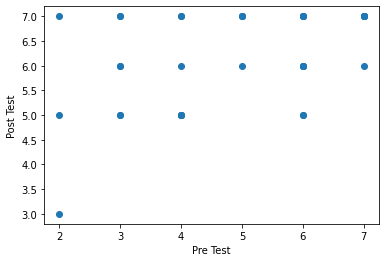

In [8]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.figure()

plt.scatter(dfe[['Pre Test']],dfe[['Post Test']])
plt.xlabel('Pre Test')
plt.ylabel('Post Test')

plt.show()

In [28]:
import seaborn as sns


<AxesSubplot:>

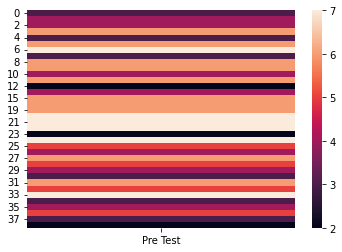

In [30]:
sns.heatmap(dfe[['Pre Test']])

<AxesSubplot:>

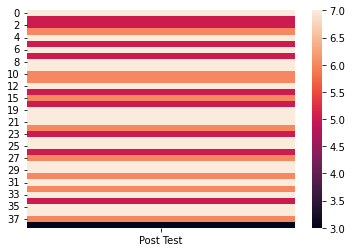

In [31]:
sns.heatmap(dfe[['Post Test']])

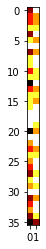

In [33]:
plt.imshow(dfe, cmap='hot')#, interpolation='nearest')
plt.show()

<AxesSubplot:>

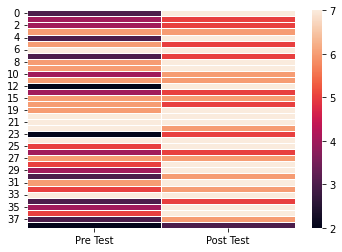

In [34]:
sns.heatmap(dfe, linewidths=0.5)

In [35]:
corr = np.corrcoef(dfe)
corr 

c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
c:\Users\redoc\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

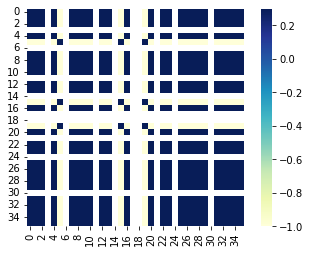

In [40]:
sns.heatmap(corr, vmax=.3, square=True,  cmap="YlGnBu")
plt.show()

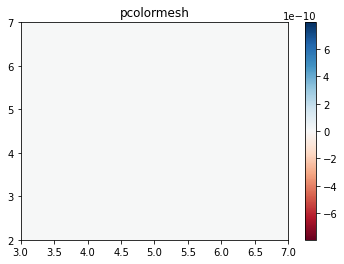

In [41]:
import matplotlib.pyplot as plt
import numpy as np

# generate 2 2d grids for the x & y bounds
y, x = np.meshgrid(dfe[['Pre Test']],dfe[['Post Test']])

z = (1 - x / 2. + x ** 5 + y ** 3) * np.exp(-x ** 2 - y ** 2)
# x and y are bounds, so z should be the value *inside* those bounds.
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
z_min, z_max = -np.abs(z).max(), np.abs(z).max()

fig, ax = plt.subplots()

c = ax.pcolormesh(x, y, z, cmap='RdBu', vmin=z_min, vmax=z_max)
ax.set_title('pcolormesh')
# set the limits of the plot to the limits of the data
ax.axis([x.min(), x.max(), y.min(), y.max()])
fig.colorbar(c, ax=ax)

plt.show()

# https://stackoverflow.com/questions/33282368/plotting-a-2d-heatmap-with-matplotlib 

In [44]:
import numpy as np
import matplotlib.pyplot as plt

x = dfe[['Pre Test']]
y = dfe[['Post Test']]
z = np.array([i*i+j*j for j in y for i in x])

X, Y = np.meshgrid(x, y)
Z = z.reshape(21, 21)

plt.pcolor(X, Y, Z)
plt.show()

TypeError: can't multiply sequence by non-int of type 'str'

In [45]:
# https://www.delftstack.com/howto/matplotlib/colorplot-of-2d-array-matplotlib/

X=np.random.randint(256, size=(10, 10))

X

array([[ 20,  46, 136, 220,  92, 163,  34, 114, 122, 155],
       [191,  55, 212, 250,  23, 250, 176,  33,  13, 225],
       [157,  37,  58, 164,  49, 254, 216, 141, 156, 240],
       [ 73, 198,  22,  10,  72,  81,  88,  76,  23,  62],
       [201, 212, 240, 122,  69,  98, 174, 142, 208, 251],
       [ 60, 104, 235, 144, 137,  13,  31,  39,  80,  50],
       [194, 254, 211,   0,  82, 106, 220, 111, 237, 132],
       [117,  72, 171,  13,  36, 227,  91, 219, 104,  42],
       [ 45, 135, 174, 203, 198, 206,  54,  73,  31, 155],
       [201, 248, 244, 103, 100,  57, 127, 228, 111,  20]])

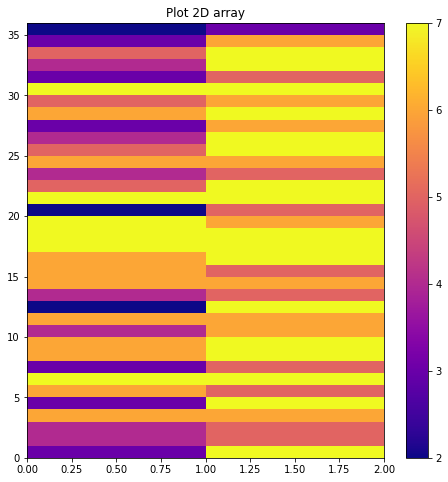

In [47]:
X=dfe

fig = plt.figure(figsize=(8,8))
plt.pcolormesh(X,cmap="plasma")
plt.title("Plot 2D array")
plt.colorbar()
plt.show()

C:\Users\redoc\AppData\Local\Temp\ipykernel_63516\3347384956.py:11: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(x, y, z, cmap=cmap)


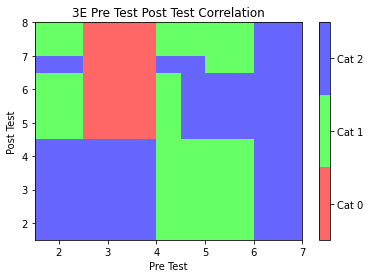

In [49]:
# NumPy-Matplotlib Pseudo-color Mesh
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Set up a 10x8 grid with random values in [0, 2] for 3 categories
x = dfe['Pre Test']
y = dfe['Post Test']
z = np.random.randint(0, 3, (len(y), len(x)))  # Random integers in [0, 2]
cmap = ListedColormap(['#FF6666', '#66FF66', '#6666FF'])  # color map for [0, 2]
plt.pcolormesh(x, y, z, cmap=cmap)
plt.xlabel('Pre Test')
plt.ylabel('Post Test')
plt.title('3E Pre Test Post Test Correlation')

# Plot colorbar for color mesh
cbar = plt.colorbar()
cbar.set_ticks([0.33, 1., 1.67])
cbar.set_ticklabels(['Cat 0', 'Cat 1', 'Cat 2'])
plt.show()

# https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python4_DataAnalysis.html

C:\Users\redoc\AppData\Local\Temp\ipykernel_63516\246561886.py:12: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(xx, yy, z, cmap=cmap)


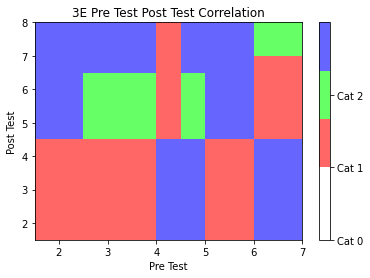

In [53]:
# NumPy-Matplotlib Pseudo-color Mesh with meshgrid
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap

# Setup a mesh grid and values
step = 0.2   # mesh step size
xx, yy = np.meshgrid(dfe['Pre Test'], dfe['Post Test'])
z = np.random.randint(0, 3, xx.shape)  # random integers in [0, 2]

cmap = ListedColormap(['#FF6666', '#66FF66', '#6666FF'])  # color map for [0, 2]
plt.pcolormesh(xx, yy, z, cmap=cmap)
plt.xlabel('Pre Test')
plt.ylabel('Post Test')
plt.title('3E Pre Test Post Test Correlation')

# Plot colorbar for color mesh
cbar = plt.colorbar()
cbar.set_ticks([-1,0,1])
cbar.set_ticklabels(['Cat 0', 'Cat 1', 'Cat 2'])
plt.show()

# https://www3.ntu.edu.sg/home/ehchua/programming/webprogramming/Python4_DataAnalysis.html

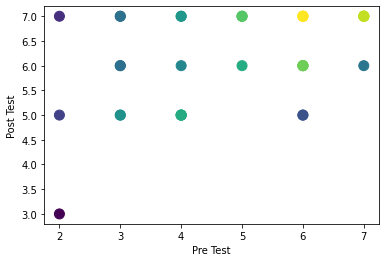

In [10]:
from scipy.stats import gaussian_kde

# Generate fake data
x = dfe['Pre Test']
y = dfe['Post Test']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

fig, ax = plt.subplots()
ax.scatter(x, y, c=z, s=100)
plt.xlabel('Pre Test')
plt.ylabel('Post Test')
plt.show()

# https://stackoverflow.com/questions/20105364/how-can-i-make-a-scatter-plot-colored-by-density-in-matplotlib